# 

In [1]:
import pandas as pd
import glob
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_json(fname):
    try:
        with open(fname, 'r') as f:
            data = json.load(f)
        return data
    except:
        return []

In [307]:
def plot_with_err(x, y_mean, y_std, linestyle=None, label=None, color='blue', marker='.',ax=None):
    sort_idx = np.argsort(x)
    x_sorted = np.array(x)[sort_idx]
    y_mean_sorted = np.array(y_mean)[sort_idx]
    y_std_sorted = np.array(y_std)[sort_idx]

    y_upper = y_mean_sorted + y_std_sorted
    y_lower = y_mean_sorted - y_std_sorted

    ax.plot(x_sorted, y_mean_sorted, label=label, linestyle=linestyle,color=color,marker=marker)

    ax.fill_between(
        x_sorted,
        y_lower,
        y_upper,
        alpha=0.1,
        color=color
    )
    return ax


def plot_with_err_(x, y_mean, y_std, linestyle=None, label=None, color='blue', marker='.', alpha=0.1, ax=None):
    y_upper = y_mean + y_std
    y_lower = y_mean - y_std

    ax.plot(
        x, 
        y_mean, 
        label=label, 
        linestyle=linestyle, 
        color=color, 
        marker=marker
    )
    ax.fill_between(
        x,
        y_lower,
        y_upper,
        alpha=alpha,
        color=color
    )
    return ax

In [305]:
style_dict = {
    'laplace': {'color': 'black', 'linestyle': '--', 'marker': '.'},
    'mle': {'color': 'red', 'linestyle': ':', 'marker': 'v'},
    'tempscale': {'color': 'blue', 'linestyle': 'dashdot', 'marker': 'o'},
    'blob': {'color': 'purple', 'linestyle': '--', 'marker': 's'},
    'scalabl': {'color': 'green', 'linestyle': 'solid', 'marker': '^'},
    'tfb': {'color': 'orange', 'linestyle': 'dashdot', 'marker': '^'},
    'mcdropout': {'color': 'green', 'linestyle': 'dashdot', 'marker': 'v'},
    #deepens
    #mcdroput
    #sgld?
    #map
    #zeroshot?
}
metric2arrow = {
    'ACC': '↑',
    'ECE': '↓',
    'NLL': '↓',
    'Brier': '↓'
}

wrapper2label = {
    'mle': 'MLE',
    'blob': 'BLoB',
    'scalabl': 'ScalaBL',
    'laplace': 'Laplace',
    'tfb': 'TFB',
    'mcdroput': 'MCDropout',
    'tempscale': 'TempScale'
}

In [362]:
exp_keys = ['model', 'quant', 'wrapper', 'rank', 'prompt_type', 'dataset', 'num_base', 'num_trainable_params', 'num_total_params']

root = '/workspace1/csamplawski/src/BayesAdapt/logs/'
root = '/project/synthesis/bayesadapt/logs/'
json_fnames = glob.glob(f'{root}/**/metrics.json', recursive=True)

expdirs = []
for fname in json_fnames:
    tokens = fname.split('/')
    edir = '/'.join(tokens[0:-1])
    expdirs.append(edir)
expdirs = list(set(expdirs))

df = []
for edir in expdirs:
    tokens = edir.replace(root, '').split('/')
    keys = ['model', 'quant', 'wrapper', 'rank', 'prompt_type', 'seed', 'dataset']
    row = dict(zip(keys, tokens[1:]))
    row['rank'] = int(tokens[4].replace('rank', ''))
    row['seed'] = int(tokens[6][-1])
    data = load_json(f'{edir}/metrics.json')
    row['results'] = data
    df.append(row)
df = pd.DataFrame(df)
df_exploded = df.explode('results').reset_index(drop=True)
metrics_df = pd.json_normalize(df_exploded['results']).drop(columns=['seed'])
df = pd.concat([df_exploded.drop(columns=['results']), metrics_df], axis=1)

In [363]:
q = df.query(f"dataset == 'winogrande_m' and prompt_type == '{prompt_type}' and wrapper == 'mle' and quant == '{quant}' and rank == {rank} and model == 'Qwen3-8B'")
q

,model,quant,wrapper,rank,prompt_type,seed,dataset,num_trainable_params,num_total_params,num_base,latency,peak_memory,ACC,ECE,NLL,Brier
17,Qwen3-8B,16bit,mle,8,instruct,2,winogrande_m,3866640,7572280336,7568413696,0.053831,14.306453,0.809787,0.166622,1.025729,0.349672
874,Qwen3-8B,16bit,mle,8,instruct,1,winogrande_m,3866640,7572280336,7568413696,0.054560,14.306377,0.819258,0.162216,1.300866,0.332998
1210,Qwen3-8B,16bit,mle,8,instruct,3,winogrande_m,3866640,7572280336,7568413696,0.053210,14.306372,0.812155,0.180327,2.218516,0.364315
1236,Qwen3-8B,16bit,mle,8,instruct,0,winogrande_m,3866640,7572280336,7568413696,0.054682,14.306705,0.810576,0.171775,1.113992,0.352328


In [364]:
df

,model,quant,wrapper,rank,prompt_type,seed,dataset,num_trainable_params,num_total_params,num_base,latency,peak_memory,ACC,ECE,NLL,Brier
0,Qwen3-14B,16bit,blob,8,instruct,2,winogrande_m,8601616,13999006736,13990405120,0.906760,26.523102,0.847672,0.066994,0.415046,0.233918
1,Qwen3-14B,16bit,blob,8,instruct,2,winogrande_m,8601616,13999006736,13990405120,0.907829,26.523102,0.847672,0.067229,0.418177,0.230107
2,Qwen3-14B,16bit,blob,8,instruct,2,winogrande_m,8601616,13999006736,13990405120,0.907506,26.523102,0.840568,0.075878,0.425697,0.239119
3,Qwen3-14B,16bit,blob,8,instruct,2,winogrande_m,8601616,13999006736,13990405120,0.907482,26.523102,0.850039,0.075076,0.423033,0.237147
4,Qwen3-14B,16bit,blob,8,instruct,2,winogrande_m,8601616,13999006736,13990405120,0.908674,26.523102,0.849250,0.064349,0.414991,0.235419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Qwen3-1.7B,16bit,blob,8,instruct,0,winogrande_m,2555920,1723134992,1720579072,0.329782,3.385262,0.479874,0.035308,0.694413,0.501266
1272,Qwen3-1.7B,16bit,blob,8,instruct,0,winogrande_m,2555920,1723134992,1720579072,0.330901,3.385262,0.511444,0.003791,0.693103,0.499955
1273,Qwen3-1.7B,16bit,blob,8,instruct,0,winogrande_m,2555920,1723134992,1720579072,0.330147,3.385262,0.508287,0.007385,0.693401,0.500251
1274,Qwen3-1.7B,16bit,blob,8,instruct,0,winogrande_m,2555920,1723134992,1720579072,0.331015,3.385262,0.526440,0.023322,0.694271,0.501118


0     0.764009
1     0.759274
2     0.758485
3     0.769534
4     0.764799
5     0.760852
6     0.764009
7     0.769534
8     0.771113
9     0.767167
10    0.773481
11    0.773481
12    0.775059
13    0.775059
14    0.774270
15    0.748224
16    0.760852
17    0.761642
18    0.768745
19    0.765588
Name: ACC, dtype: float64

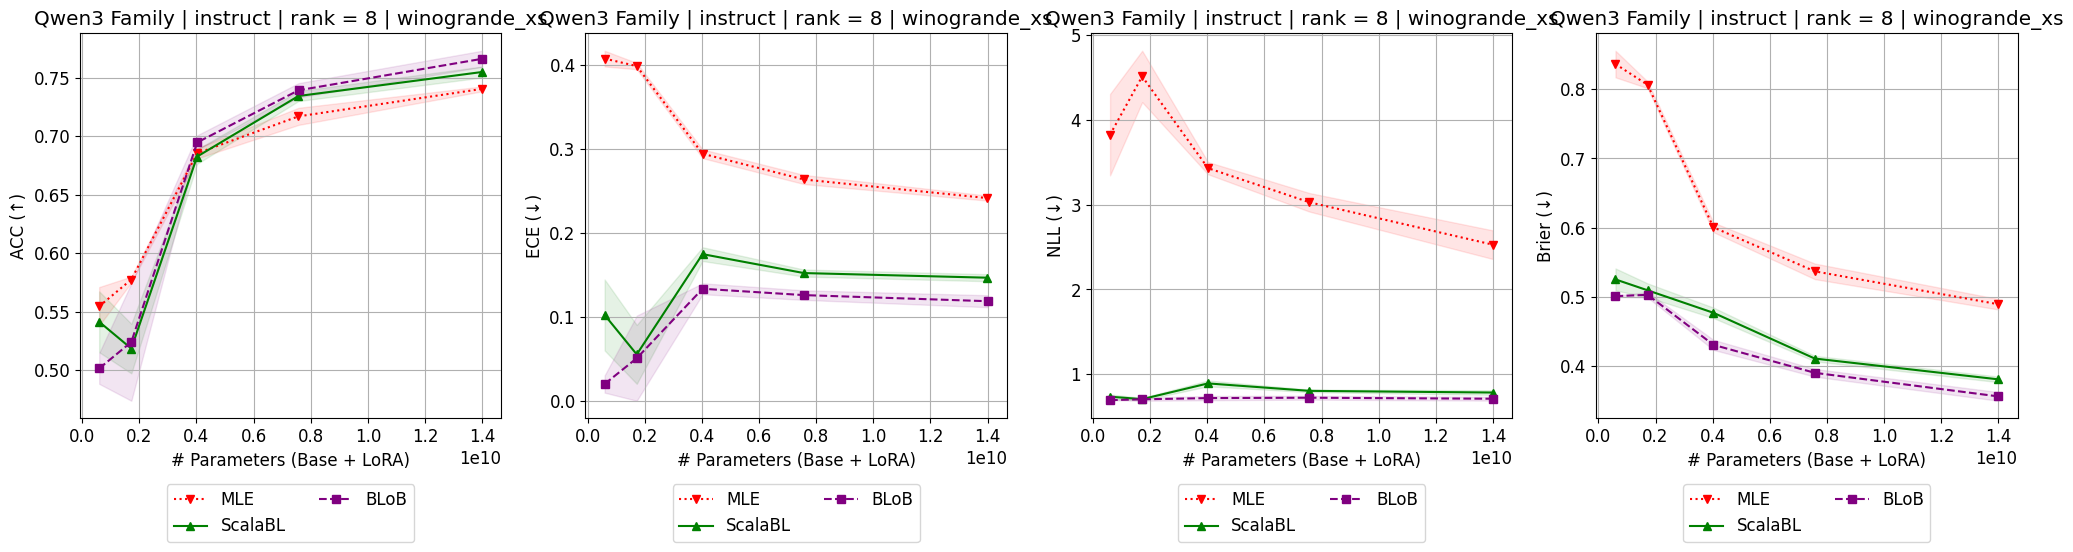

In [365]:
#ax = plt.gca()
fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=False)
plt.rcParams.update({'font.size': 12})
metrics = ['ACC', 'ECE', 'NLL', 'Brier']

dataset = 'winogrande_xs'
prompt_type = 'instruct'
quant = '16bit'
rank = 8

for ax, metric in zip(axes, metrics):
    arrow = metric2arrow[metric]
    for wrapper in ['mle', 'scalabl', 'blob']:
        label = wrapper2label[wrapper]
        metric_df = df.groupby(exp_keys)[metric].agg(['mean', 'std'])
        metric_vals = df.query(f"dataset == '{dataset}' and prompt_type == '{prompt_type}' and wrapper == '{wrapper}' and quant == '{quant}' and rank == {rank} and model == 'Qwen3-14B'" ).reset_index()[metric]
        ax = plot_with_err(q['num_total_params'], q['mean'], q['std'], **style_dict[wrapper], label=label, ax=ax)

    ax.set_xlabel('# Parameters (Base + LoRA)')
    ax.set_ylabel(f"{metric} ({arrow})")
    ax.legend(
        loc='upper center',          # Anchor point on the legend box itself
        bbox_to_anchor=(0.5, -0.15), # (x, y) coordinates relative to the plot axes
        ncols=2,       # Forces all items into a single row
        frameon=True                # Optional: removes the box border for a cleaner look
    )
    ax.set_title(f'Qwen3 Family | {prompt_type} | rank = {rank} | {dataset}')
    ax.grid()


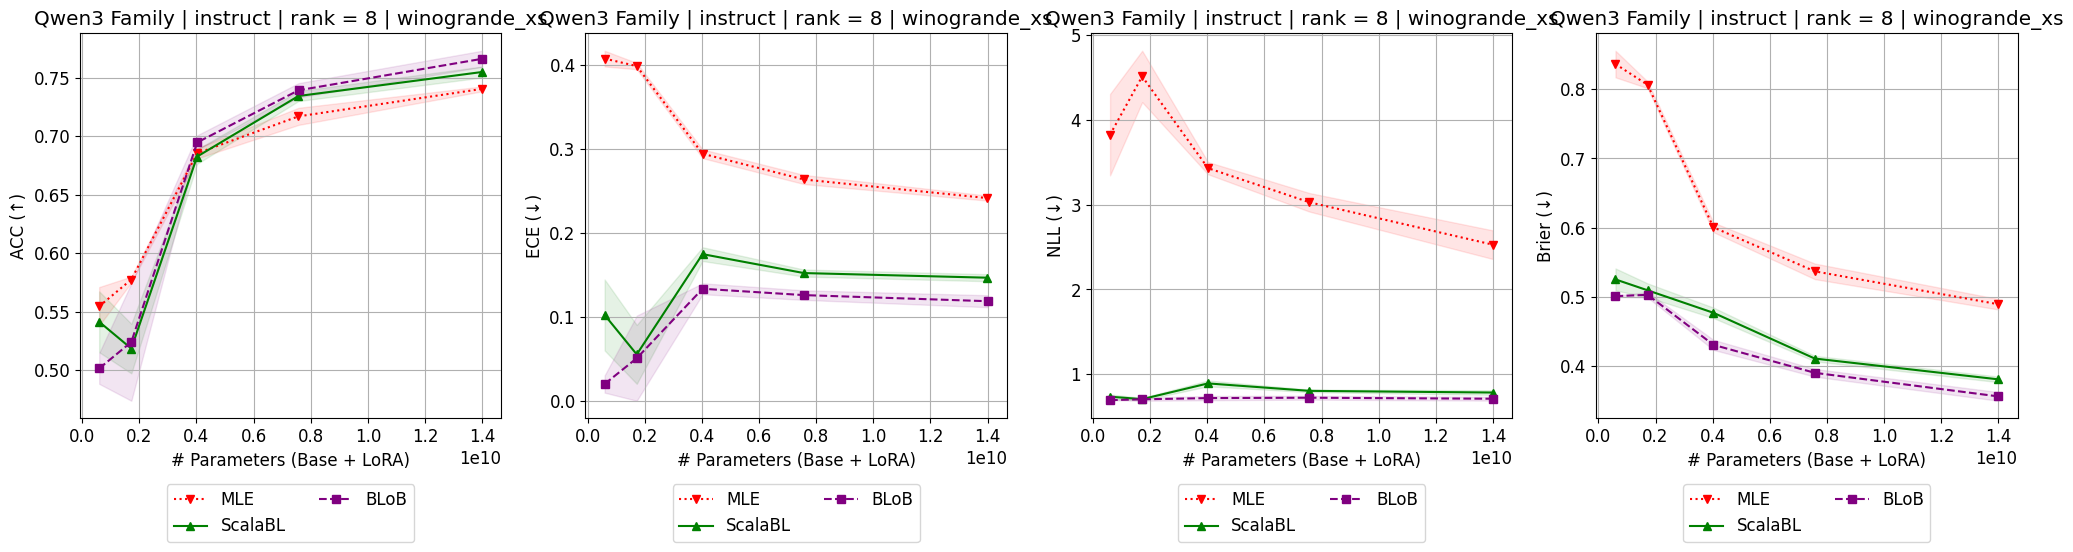

In [365]:
#ax = plt.gca()
fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=False)
plt.rcParams.update({'font.size': 12})
metrics = ['ACC', 'ECE', 'NLL', 'Brier']

dataset = 'winogrande_xs'
prompt_type = 'instruct'
quant = '16bit'
rank = 8

for ax, metric in zip(axes, metrics):
    arrow = metric2arrow[metric]
    for wrapper in ['mle', 'scalabl', 'blob']:
        label = wrapper2label[wrapper]
        metric_df = df.groupby(exp_keys)[metric].agg(['mean', 'std'])
        q = metric_df.query(f"dataset == '{dataset}' and prompt_type == '{prompt_type}' and wrapper == '{wrapper}' and quant == '{quant}' and rank == {rank}").reset_index()
        ax = plot_with_err(q['num_total_params'], q['mean'], q['std'], **style_dict[wrapper], label=label, ax=ax)

    ax.set_xlabel('# Parameters (Base + LoRA)')
    ax.set_ylabel(f"{metric} ({arrow})")
    ax.legend(
        loc='upper center',          # Anchor point on the legend box itself
        bbox_to_anchor=(0.5, -0.15), # (x, y) coordinates relative to the plot axes
        ncols=2,       # Forces all items into a single row
        frameon=True                # Optional: removes the box border for a cleaner look
    )
    ax.set_title(f'Qwen3 Family | {prompt_type} | rank = {rank} | {dataset}')
    ax.grid()


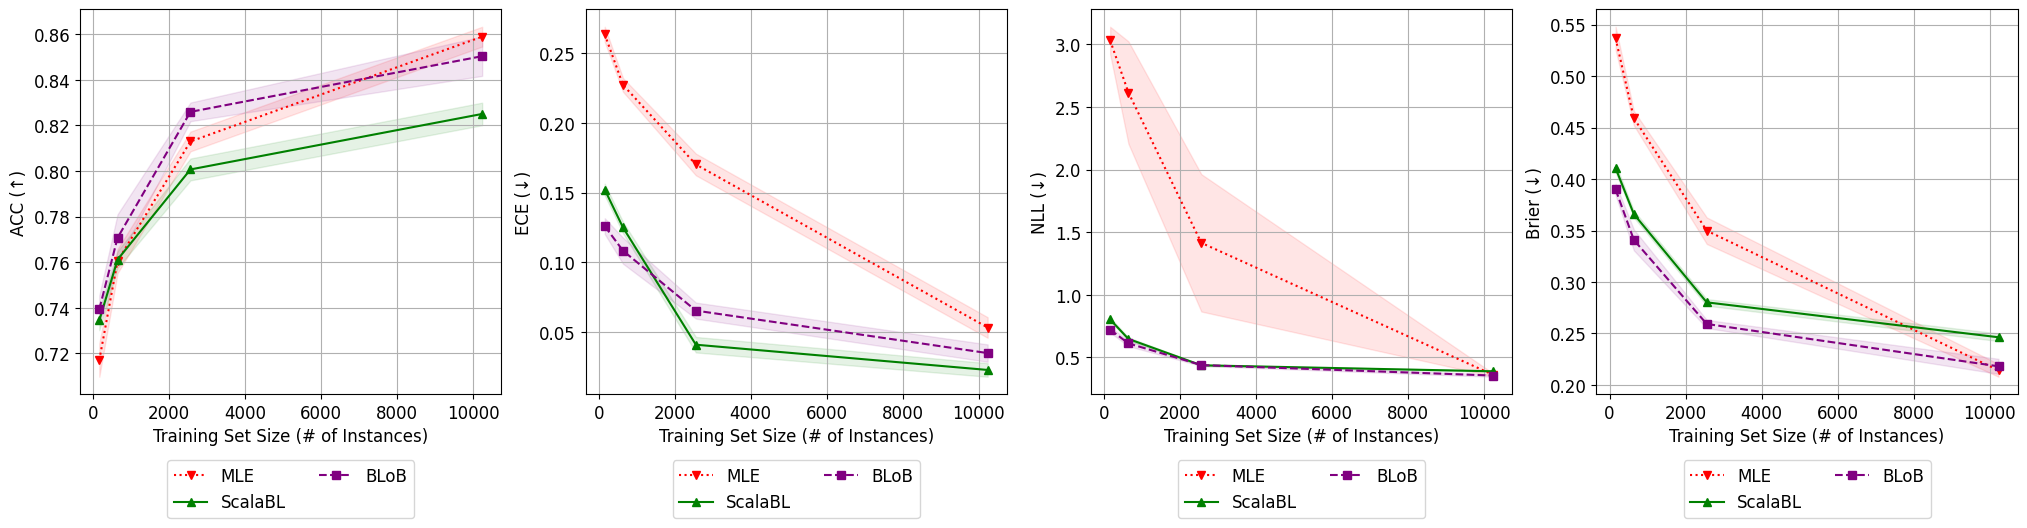

In [360]:
#ax = plt.gca()
fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=False)
plt.rcParams.update({'font.size': 12})
metrics = ['ACC', 'ECE', 'NLL', 'Brier']

dataset_sizes = ['xs','s','m','l']
x_vals = [160,640,2558,10234]
prompt_type = 'instruct'
quant = '16bit'
model = 'Qwen3-8B'
rank = 8

for ax, metric in zip(axes, metrics):
    arrow = metric2arrow[metric]
    for wrapper in ['mle', 'scalabl', 'blob']:
        label = wrapper2label[wrapper]
        y_mean, y_std = [], []
        for size in dataset_sizes:
            metric_df = df.groupby(exp_keys)[metric].agg(['mean', 'std'])
            q = metric_df.query(f"dataset == 'winogrande_{size}' and prompt_type == '{prompt_type}' and model == '{model}' and wrapper == '{wrapper}' and quant == '{quant}' and rank == {rank}").reset_index()
            y_mean.append(q['mean'].item())
            y_std.append(q['std'].item())
        ax = plot_with_err(x_vals, y_mean, y_std, **style_dict[wrapper], label=label, ax=ax)
    ax.grid()
    ax.set_ylabel(f"{metric} ({arrow})")
    ax.set_xlabel('Training Set Size (# of Instances)')
    ax.legend(
        loc='upper center',          # Anchor point on the legend box itself
        bbox_to_anchor=(0.5, -0.15), # (x, y) coordinates relative to the plot axes
        ncols=2,       # Forces all items into a single row
        frameon=True                # Optional: removes the box border for a cleaner look
    )

In [ ]:
q.reset_index()['model']

In [ ]:
list(q['model'])

In [ ]:
root = '/workspace1/csamplawski/src/BayesAdapt/logs/'
json_fnames = glob.glob(f'{root}/**/metrics.json', recursive=True)

expdirs = []
for fname in json_fnames:
    tokens = fname.split('/')
    edir = '/'.join(tokens[0:-1])
    expdirs.append(edir)
expdirs = list(set(expdirs))

df = []
for edir in expdirs:
    if 'scalabl' not in edir:
        continue
    tokens = edir.replace(root, '').split('/')
    print(tokens)
    keys = ['model', 'quant', 'wrapper', 'rank', 'prompt_type', 'seed', 'dataset']
    row = dict(zip(keys, tokens[1:]))
    data = load_json(f'{edir}/metrics.json')
    print(row)
    print(data)
    
    data = []
    for seed_dir in glob.glob(f'{edir}/*'):
        data += load_json(f'{seed_dir}/results.json')

        try:
            params_info = load_json(f'{seed_dir}/num_params.json')
            row['trainable_params'] = params_info['trainable']
            row['total_params'] = params_info['total']
        except:
            pass
            
        try:
            row['trainable_params'] = data[-1]['num_trainable_params']
            row['total_params'] = data[-1]['num_total_params']
        except:
            pass 
            
    data = pd.DataFrame(data)
    row['latency'] = data['latency'].median()
    row['peak_memory'] = data['peak_memory'].median()
    for metric in ['ACC', 'ECE', 'NLL']:
        row[f'{metric}_mean'] = data[metric].mean()
        row[f'{metric}_std']  = data[metric].std()
    df.append(row)
df = pd.DataFrame(df)


In [ ]:
cond = df['model'].str.contains('Qwen2.5')
df = df[cond]

In [ ]:
#supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
ax = plt.gca()
plt.rcParams.update({'font.size': 12})

metric = 'ACC'
dataset = 'winogrande_s'
prompt_type = 'instruct'
x_key = 'total_params'

cond = df['model'].str.contains('Qwen2.5')
df[cond]


for wrapper in style_dict.keys():
    q = df.query(f"dataset == '{dataset}' and prompt_type == '{prompt_type}' and wrapper == '{wrapper}'")
    ax = plot_with_err(q[x_key], q[f'{metric}_mean'], q[f'{metric}_std'], **style_dict[wrapper], label=wrapper, ax=ax)
    
ax.grid()
ax.set_xlabel('# Parameters (Base + LoRA)')
ax.set_ylabel(metric)
ax.legend(
    loc='upper center',          # Anchor point on the legend box itself
    bbox_to_anchor=(0.5, -0.15), # (x, y) coordinates relative to the plot axes
    ncols=len(style_dict),       # Forces all items into a single row
    frameon=True                # Optional: removes the box border for a cleaner look
)
ax.set_title(f'Qwen3 Family | Instruct | rank = 8 | {dataset}')
#ax.set_xticks(x)
#ax.set_xlim(min(x), max(x))
#ax.set_xticklabels(q['model'])
#ax.set_ylim(0.5,1.0)
#q = df.query("dataset == 'winogrande_s' and prompt_type == 'base'")
#plt.scatter(q['total_params'], q['ACC_mean'], label='base')

#plt.grid()
#plt.legend()

In [ ]:
import matplotlib.pyplot as plt

# 1. Setup your configuration
metrics = ['ACC', 'ECE', 'NLL'] 
dataset = 'ARC-Easy'
prompt_type = 'base'
x_key = 'total_params'
for dataset in ['winogrande_s', 'winogrande_m', 'ARC-Easy', 'ARC-Challenge', 'obqa']:
    plt.rcParams.update({'font.size': 12})
    
    # 2. Create a figure with 1 row and 3 columns
    # figsize is (width, height). Increase width to accommodate 3 plots.
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
    
    for ax, metric in zip(axes, metrics):
        for wrapper in style_dict.keys():
            #if wrapper == 'zeroshot':
            #    continue
            q = df.query(f"dataset == '{dataset}' and prompt_type == '{prompt_type}' and wrapper == '{wrapper}'")
            
            plot_with_err(
                q[x_key], 
                q[f'{metric}_mean'], 
                q[f'{metric}_std'], 
                **style_dict[wrapper], 
                label=wrapper, 
                ax=ax
            )
    
        ax.grid(True)
        ax.set_xlabel('# Parameters (Base + LoRA)')
        #ax.set_ylabel(metric)
        ax.set_title(metric) # Or more specific title if needed
    
    # 4. Create the Global Legend
    # We grab handles and labels from the first axis (axes[0]) since they are identical across plots
    handles, labels = axes[0].get_legend_handles_labels()
    
    fig.legend(
        handles, 
        labels,
        loc='lower center',           # Anchor point of the legend
        bbox_to_anchor=(0.5, -0.1),   # (x, y) coordinates relative to the WHOLE FIGURE (0,0 is bottom-left)
        ncols=len(style_dict),        # Single row
        frameon=True
    )
    
    # 5. formatting
    fig.suptitle(f'Qwen3 Family | Instruct | rank = 8 | {dataset}', fontsize=16)
    plt.tight_layout() 

# Adjust layout to make room for the legend at the bottom
# (tight_layout calculates spacing, then we shrink the bottom margin slightly)
#plt.subplots_adjust(bottom=0.2) 
